## Predictitng the Gas Consumption (gallon) in New York City based on past data

https://www.kaggle.com/datasets/thedevastator/titles-go-here?select=heating-oil-consumption-and-cost-2010-feb-2022-1.csv

## 1. Problem Definition
> Predict the future Gas consumption based on previous data 

## 2. Feature Definition
The dataset provides monthly consumption and cost data for heating oil in New York City

* Development Name: The name of the development. (String)
* Borough: The borough in which the development is located. (String)
* Account Name: The name of the account. (String)
* Location: The location of the development. (String)
* Meter AMR: The meter's AMR reading. (String)
* Meter Scope: The meter's scope. (String)
* TDS #: The TDS number. (String)
* EDP: The EDP. (String)
* RC Code: The RC code. (String)
* Funding Source: The funding source. (String)
* AMP #: The AMP number. (String)
* Vendor Name: The name of the vendor. (String)
* Revenue Month: The revenue month. (String)
* Service Start Date: The service start date. (String)
* Service End Date: The service end date. (String)
* #days: The number of days in the service period. (String)
* Meter Number: The meter number. (String)
* Estimated: Whether or not the consumption is estimated. (String)
* Current Charges: The current charges. (String)
* Consumption (GAL): The consumption in gallons. (String)

In [569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [570]:
#Import training and validation set

df = pd.read_csv('data/heating-oil-consumption-and-cost-2010-feb-2022-1.csv')
                
df

,index,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,...,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Consumption (GAL)
0,0,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897085,2010-01,12/24/2009,01/26/2010,33,395416152700002-OIL,N,303.47,148.0
1,1,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897086,2010-02,01/26/2010,02/25/2010,30,395416152700002-OIL,N,504.41,246.0
2,2,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897087,2010-03,02/25/2010,03/26/2010,29,395416152700002-OIL,N,200.94,98.0
3,3,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897088,2010-05,04/26/2010,05/24/2010,28,395416152700002-OIL,N,789.42,385.0
4,4,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897089,2010-06,05/24/2010,06/23/2010,30,395416152700002-OIL,N,488.01,238.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,14623,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,...,"East Coast Petroleum, Inc.",11079104,2021-05,04/22/2021,05/21/2021,29,395416144000008-OIL,N,0.00,661.0
14624,14624,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,...,"East Coast Petroleum, Inc.",11079151,2021-11,10/20/2021,11/19/2021,30,395416144000008-OIL,N,0.00,501.0
14625,14625,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,...,"East Coast Petroleum, Inc.",11079164,2021-12,11/19/2021,12/21/2021,32,395416144000008-OIL,N,0.00,4463.0
14626,14626,WOODSIDE,QUEENS,WOODSIDE,NaN,Not Applicable,NaN,33,316,Q003300,...,"East Coast Petroleum, Inc.",11079139,2021-09,08/26/2021,09/24/2021,29,0692010600-OIL,N,0.00,-6660.0


In [571]:
df.columns

Index(['index', 'Development Name', 'Borough', 'Account Name', 'Location',
       'Meter AMR', 'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source',
       'AMP #', 'Vendor Name', 'UMIS BILL ID', 'Revenue Month',
       'Service Start Date', 'Service End Date', '# days', 'Meter Number',
       'Estimated', 'Current Charges', 'Consumption (GAL)'],
      dtype='object')

In [572]:
df.dtypes

index                   int64
Development Name       object
Borough                object
Account Name           object
Location               object
Meter AMR              object
Meter Scope            object
TDS #                   int64
EDP                     int64
RC Code                object
Funding Source         object
AMP #                  object
Vendor Name            object
UMIS BILL ID            int64
Revenue Month          object
Service Start Date     object
Service End Date       object
# days                  int64
Meter Number           object
Estimated              object
Current Charges       float64
Consumption (GAL)     float64
dtype: object

## Cleaning the data

In [573]:
df = pd.read_csv('data/heating-oil-consumption-and-cost-2010-feb-2022-1.csv',
                parse_dates = ['Service Start Date', 'Service End Date', 'Revenue Month' ])
df

,index,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,...,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Consumption (GAL)
0,0,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897085,2010-01-01,2009-12-24,2010-01-26,33,395416152700002-OIL,N,303.47,148.0
1,1,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897086,2010-02-01,2010-01-26,2010-02-25,30,395416152700002-OIL,N,504.41,246.0
2,2,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897087,2010-03-01,2010-02-25,2010-03-26,29,395416152700002-OIL,N,200.94,98.0
3,3,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897088,2010-05-01,2010-04-26,2010-05-24,28,395416152700002-OIL,N,789.42,385.0
4,4,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897089,2010-06-01,2010-05-24,2010-06-23,30,395416152700002-OIL,N,488.01,238.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,14623,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,...,"East Coast Petroleum, Inc.",11079104,2021-05-01,2021-04-22,2021-05-21,29,395416144000008-OIL,N,0.00,661.0
14624,14624,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,...,"East Coast Petroleum, Inc.",11079151,2021-11-01,2021-10-20,2021-11-19,30,395416144000008-OIL,N,0.00,501.0
14625,14625,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,...,"East Coast Petroleum, Inc.",11079164,2021-12-01,2021-11-19,2021-12-21,32,395416144000008-OIL,N,0.00,4463.0
14626,14626,WOODSIDE,QUEENS,WOODSIDE,NaN,Not Applicable,NaN,33,316,Q003300,...,"East Coast Petroleum, Inc.",11079139,2021-09-01,2021-08-26,2021-09-24,29,0692010600-OIL,N,0.00,-6660.0


In [574]:
df['Revenue Month'].dtype

dtype('<M8[ns]')

In [575]:
df.dtypes

index                          int64
Development Name              object
Borough                       object
Account Name                  object
Location                      object
Meter AMR                     object
Meter Scope                   object
TDS #                          int64
EDP                            int64
RC Code                       object
Funding Source                object
AMP #                         object
Vendor Name                   object
UMIS BILL ID                   int64
Revenue Month         datetime64[ns]
Service Start Date    datetime64[ns]
Service End Date      datetime64[ns]
# days                         int64
Meter Number                  object
Estimated                     object
Current Charges              float64
Consumption (GAL)            float64
dtype: object

In [576]:
df.columns

Index(['index', 'Development Name', 'Borough', 'Account Name', 'Location',
       'Meter AMR', 'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source',
       'AMP #', 'Vendor Name', 'UMIS BILL ID', 'Revenue Month',
       'Service Start Date', 'Service End Date', '# days', 'Meter Number',
       'Estimated', 'Current Charges', 'Consumption (GAL)'],
      dtype='object')

In [577]:
# Get rid of repeated index
df.drop('index', axis =1, inplace= True )
df.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Consumption (GAL)
0,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,"S.J. Fuel Co., Inc.",2897085,2010-01-01,2009-12-24,2010-01-26,33,395416152700002-OIL,N,303.47,148.0
1,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,"S.J. Fuel Co., Inc.",2897086,2010-02-01,2010-01-26,2010-02-25,30,395416152700002-OIL,N,504.41,246.0
2,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,"S.J. Fuel Co., Inc.",2897087,2010-03-01,2010-02-25,2010-03-26,29,395416152700002-OIL,N,200.94,98.0
3,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,"S.J. Fuel Co., Inc.",2897088,2010-05-01,2010-04-26,2010-05-24,28,395416152700002-OIL,N,789.42,385.0
4,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,"S.J. Fuel Co., Inc.",2897089,2010-06-01,2010-05-24,2010-06-23,30,395416152700002-OIL,N,488.01,238.0


In [578]:
# Enrich the data by intrepreting the Date time object

df['Revenue_Year'] = df['Revenue Month'].dt.year
df['Revenue_Month'] = df['Revenue Month'].dt.month
df['Revenue_day'] = df['Revenue Month'].dt.day
df['ServiceStart_Year'] = df['Service Start Date'].dt.year
df['ServiceStart_Month']= df['Service Start Date'].dt.month
df['ServiceStart_Day']= df['Service Start Date'].dt.day
df['ServiceEnd_Year']= df['Revenue Month'].dt.year
df['ServiceEnd_Month']= df['Service Start Date'].dt.month
df['ServiceEnd_Day']= df['Service Start Date'].dt.day

In [579]:
df.drop(['Revenue Month','Revenue Month','Revenue Month'], axis =1, inplace = True)

df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Consumption (GAL),Revenue_Year,Revenue_Month,Revenue_day,ServiceStart_Year,ServiceStart_Month,ServiceStart_Day,ServiceEnd_Year,ServiceEnd_Month,ServiceEnd_Day
0,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,148.0,2010,1,1,2009,12,24,2010,12,24
1,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,246.0,2010,2,1,2010,1,26,2010,1,26
2,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,98.0,2010,3,1,2010,2,25,2010,2,25
3,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,385.0,2010,5,1,2010,4,26,2010,4,26
4,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,FEDERAL,...,238.0,2010,6,1,2010,5,24,2010,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,FEDERAL,...,661.0,2021,5,1,2021,4,22,2021,4,22
14624,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,FEDERAL,...,501.0,2021,11,1,2021,10,20,2021,10,20
14625,1471 WATSON AVENUE,BRONX,WATSON AVENUE,BLD 01,NONE,NaN,214,332,B021400,FEDERAL,...,4463.0,2021,12,1,2021,11,19,2021,11,19
14626,WOODSIDE,QUEENS,WOODSIDE,NaN,Not Applicable,NaN,33,316,Q003300,FEDERAL,...,-6660.0,2021,9,1,2021,8,26,2021,8,26


In [580]:
df.dtypes

Development Name              object
Borough                       object
Account Name                  object
Location                      object
Meter AMR                     object
Meter Scope                   object
TDS #                          int64
EDP                            int64
RC Code                       object
Funding Source                object
AMP #                         object
Vendor Name                   object
UMIS BILL ID                   int64
Service Start Date    datetime64[ns]
Service End Date      datetime64[ns]
# days                         int64
Meter Number                  object
Estimated                     object
Current Charges              float64
Consumption (GAL)            float64
Revenue_Year                   int64
Revenue_Month                  int64
Revenue_day                    int64
ServiceStart_Year              int64
ServiceStart_Month             int64
ServiceStart_Day               int64
ServiceEnd_Year                int64
S

In [581]:
#Filling the Null Value

In [582]:
df.isna().sum()

Development Name          0
Borough                   0
Account Name              0
Location              13666
Meter AMR               555
Meter Scope           14606
TDS #                     0
EDP                       0
RC Code                   0
Funding Source         1522
AMP #                  2138
Vendor Name               0
UMIS BILL ID              0
Service Start Date        0
Service End Date          0
# days                    0
Meter Number              0
Estimated                 0
Current Charges           0
Consumption (GAL)         0
Revenue_Year              0
Revenue_Month             0
Revenue_day               0
ServiceStart_Year         0
ServiceStart_Month        0
ServiceStart_Day          0
ServiceEnd_Year           0
ServiceEnd_Month          0
ServiceEnd_Day            0
dtype: int64

In [583]:
df[['Location','Meter AMR','Meter Scope','Funding Source','AMP #']]

,Location,Meter AMR,Meter Scope,Funding Source,AMP #
0,NaN,Not Applicable,NaN,FEDERAL,NY005001180P
1,NaN,Not Applicable,NaN,FEDERAL,NY005001180P
2,NaN,Not Applicable,NaN,FEDERAL,NY005001180P
3,NaN,Not Applicable,NaN,FEDERAL,NY005001180P
4,NaN,Not Applicable,NaN,FEDERAL,NY005001180P
...,...,...,...,...,...
14623,BLD 01,NONE,NaN,FEDERAL,NY005010670P
14624,BLD 01,NONE,NaN,FEDERAL,NY005010670P
14625,BLD 01,NONE,NaN,FEDERAL,NY005010670P
14626,NaN,Not Applicable,NaN,FEDERAL,NY005000330P


In [584]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = pd.Categorical(content).codes +1
        print(label)

Development Name
Borough
Account Name
Location
Meter AMR
Meter Scope
RC Code
Funding Source
AMP #
Vendor Name
Meter Number
Estimated


In [585]:
df.Location.dtypes

dtype('int8')

In [586]:
df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Consumption (GAL),Revenue_Year,Revenue_Month,Revenue_day,ServiceStart_Year,ServiceStart_Month,ServiceStart_Day,ServiceEnd_Year,ServiceEnd_Month,ServiceEnd_Day
0,8,1,1,0,3,0,118,248,24,1,...,148.0,2010,1,1,2009,12,24,2010,12,24
1,8,1,1,0,3,0,118,248,24,1,...,246.0,2010,2,1,2010,1,26,2010,1,26
2,8,1,1,0,3,0,118,248,24,1,...,98.0,2010,3,1,2010,2,25,2010,2,25
3,8,1,1,0,3,0,118,248,24,1,...,385.0,2010,5,1,2010,4,26,2010,4,26
4,8,1,1,0,3,0,118,248,24,1,...,238.0,2010,6,1,2010,5,24,2010,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,3,1,216,4,2,0,214,332,43,1,...,661.0,2021,5,1,2021,4,22,2021,4,22
14624,3,1,216,4,2,0,214,332,43,1,...,501.0,2021,11,1,2021,10,20,2021,10,20
14625,3,1,216,4,2,0,214,332,43,1,...,4463.0,2021,12,1,2021,11,19,2021,11,19
14626,274,5,227,0,3,0,33,316,219,1,...,-6660.0,2021,9,1,2021,8,26,2021,8,26


In [587]:
df.dtypes

Development Name               int16
Borough                         int8
Account Name                   int16
Location                        int8
Meter AMR                       int8
Meter Scope                     int8
TDS #                          int64
EDP                            int64
RC Code                        int16
Funding Source                  int8
AMP #                          int16
Vendor Name                     int8
UMIS BILL ID                   int64
Service Start Date    datetime64[ns]
Service End Date      datetime64[ns]
# days                         int64
Meter Number                   int16
Estimated                       int8
Current Charges              float64
Consumption (GAL)            float64
Revenue_Year                   int64
Revenue_Month                  int64
Revenue_day                    int64
ServiceStart_Year              int64
ServiceStart_Month             int64
ServiceStart_Day               int64
ServiceEnd_Year                int64
S

In [588]:
df.drop(['Service Start Date','Service End Date'], axis =1, inplace = True)

In [589]:
df.dtypes

Development Name        int16
Borough                  int8
Account Name            int16
Location                 int8
Meter AMR                int8
Meter Scope              int8
TDS #                   int64
EDP                     int64
RC Code                 int16
Funding Source           int8
AMP #                   int16
Vendor Name              int8
UMIS BILL ID            int64
# days                  int64
Meter Number            int16
Estimated                int8
Current Charges       float64
Consumption (GAL)     float64
Revenue_Year            int64
Revenue_Month           int64
Revenue_day             int64
ServiceStart_Year       int64
ServiceStart_Month      int64
ServiceStart_Day        int64
ServiceEnd_Year         int64
ServiceEnd_Month        int64
ServiceEnd_Day          int64
dtype: object

In [590]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

## Try also Lasso ElasticNet and Ridge Regression and SVC

##-------------------------------------------------------------------------
estimator1 = RandomForestRegressor(n_jobs = -1,
                                  random_state = 42)

## Splitting the data into train test
x = df.drop('Consumption (GAL)', axis =1)
y = df['Consumption (GAL)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

##Fit
estimator1.fit(x_train, y_train)

##Prediction
y_preds = estimator1.predict(x_test)

In [614]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
##score and evaluation 

def evaluate_function(model_name, y_test, y_preds):
    dict = {
    model_name +' R2 Score': r2_score(y_test, y_preds),
    model_name+ ' Mean Absolute Error':mean_absolute_error(y_test, y_preds),
    model_name + ' Mean Squared Error':mean_squared_error(y_test, y_preds)
    }

    return dict

In [591]:
np.logspace(-1e-5, 0.1, 20)

array([0.99997697, 1.01217052, 1.02451275, 1.03700548, 1.04965055,
       1.0624498 , 1.07540513, 1.08851844, 1.10179164, 1.1152267 ,
       1.12882558, 1.14259028, 1.15652283, 1.17062527, 1.18489967,
       1.19934813, 1.21397278, 1.22877575, 1.24375923, 1.25892541])

In [642]:
from sklearn.preprocessing import normalize
np.random.seed(42)
estimator2 = linear_model.RidgeCV(alphas=np.logspace(1e-8, 1e-2, 20),
                                 cv = 10)

x_train_norm = normalize(x_train, norm='l2')
x_test_norm = normalize(x_test, norm='l2')
estimator2.fit(x_train_norm, y_train)
estimator2_preds = estimator2.predict(x_test_norm)
score_2 = evaluate_function('Ridge', y_test,estimator2_preds )
score_2

{'Ridge R2 Score': 0.6602784221518183,
 'Ridge Mean Absolute Error': 5600.794697994966,
 'Ridge Mean Squared Error': 104340294.93880247}

In [635]:
np.random.seed(42)
estimator3 = linear_model.LassoCV(alphas = np.logspace(0.1, 30, 40),
                                 max_iter=30000,
                                 tol = 0.01,
                                  cv = 10
                                 )
estimator3.fit(x_train, y_train)
estimator3_preds = estimator3.predict(x_test)
score_3 = evaluate_function('Lasso', y_test,estimator3_preds )
score_3

C:\Users\lawma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458253621323.0089, tolerance: 45363420093.64086
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lawma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264329025712.81696, tolerance: 46608904405.63796
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lawma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464685200120.72217, tolerance: 46048279209.23551
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lawma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

{'Lasso R2 Score': 0.7796078566474,
 'Lasso Mean Absolute Error': 3485.31959806798,
 'Lasso Mean Squared Error': 67690081.34620671}

In [631]:
np.random.seed(42)
estimator4 = linear_model.ElasticNetCV(random_state = 42,
                                      cv = 10,
                                      alphas = np.logspace(0.01, 50, 40))
estimator4.fit(x_train, y_train)
estimator4.score(x_test, y_test)

estimator4_preds = estimator4.predict(x_test)
score_4 = evaluate_function('ElasticNet', y_test,estimator4_preds )

score_4

{'ElasticNet R2 Score': 0.7816520893740451,
 'ElasticNet Mean Absolute Error': 3508.8219206307826,
 'ElasticNet Mean Squared Error': 67062226.48054663}

In [594]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
##score and evaluation 

rf_dict = {
    'Coefficient of Determination': estimator1.score(x_test, y_test),
    'R2 Score': r2_score(y_test, y_preds),
    'Mean Absolute Error':mean_absolute_error(y_test, y_preds),
    'Mean Squared Error':mean_squared_error(y_test, y_preds)
}


rf_dict

{'Coefficient of Determination': 0.9626173091135385,
 'R2 Score': 0.9626173091135385,
 'Mean Absolute Error': 786.941163157895,
 'Mean Squared Error': 11481522.655715989}

In [636]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cs_score = cross_val_score(estimator1,
                           x,
                           y,
                           cv =10,
                           scoring = 'r2'
                          )
np.mean(cs_score)

0.84096243197171

In [637]:
cs_score

array([0.89284392, 0.9901464 , 0.95766785, 0.96139238, 0.89057964,
       0.83717296, 0.97858576, 0.86563027, 0.83975154, 0.1958536 ])

Text(0.5, 1.0, 'R2 Score for 5Fold CrossValidation in RandomForestRregression')

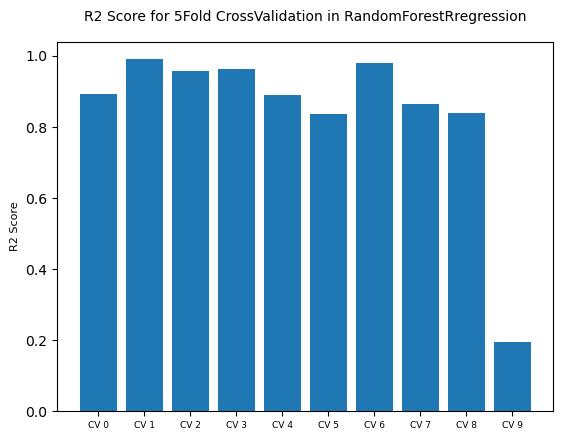

In [663]:
x_label = [f'CV {i}' for i in range(cs_score.size)]


plt.bar(x_label, cs_score)
plt.xticks( fontsize = 6.5)
plt.ylabel('R2 Score', fontsize = 8)
plt.title('R2 Score for 5Fold CrossValidation in RandomForestRregression', fontsize = 10, pad =15 )

In [598]:
df_plot = pd.DataFrame(rf_dict, index =[0])
df_plot.T

,0
Coefficient of Determination,9.626173e-01
R2 Score,9.626173e-01
Mean Absolute Error,7.869412e+02
Mean Squared Error,1.148152e+07


Text(0.5, 1.0, '#Gas Consumption in NYC from year 2010-2020')

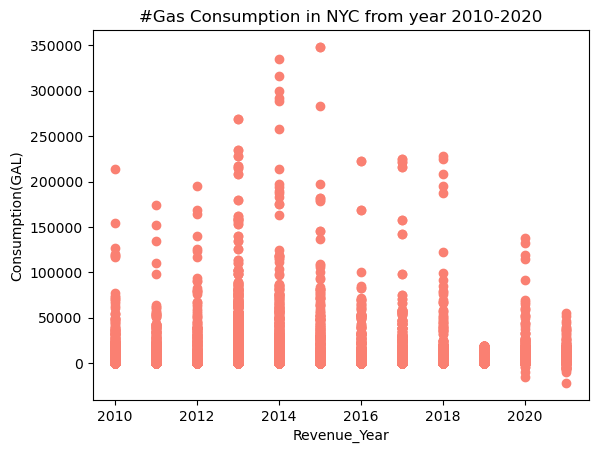

In [651]:
df_vis = df.copy(deep = True)
df_vis.sort_values(by = 'Revenue_Year', ascending= False, inplace = True)
plt.scatter(df['Revenue_Year'], df['Consumption (GAL)'], color = 'salmon')
plt.xlabel('Revenue_Year')
plt.ylabel('Consumption(GAL)')
plt.title('#Gas Consumption in NYC from year 2010-2020')